# Laboratorio 2 Machine Learning Avanzado - Red Neuronal LSTM

## Integrantes

- Sebastián Gacitúa
- Bastián Guzmán
- Jose Zamora
- Leandro Aroca
- Matthias Clein

## Librerías

In [1]:
import numpy as np
from skimage import io, color
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, LSTM

## Imagenes

### Carga y lectura de imagenes

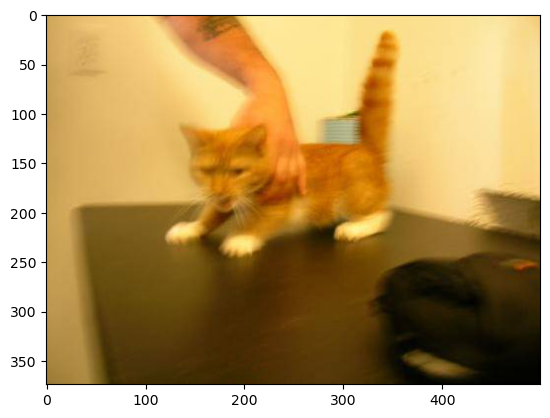

(374, 500, 3)


In [2]:
ruta = "/Users/joseignaciozamora/Library/CloudStorage/GoogleDrive-ignaciozcifras@gmail.com/Mi unidad/Magister/3er Trimestre/Machine Learning Avanzado/Databases/dogs-vs-cats/train/"

image = io.imread(ruta + "cat.0.jpg")
plt.imshow(image)
plt.show()
print(image.shape)

In [3]:
def generate_data(num_images):
    images = []
    labels = []
    for i in range(0, num_images):
        path = ruta + "cat.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(0)

    for i in range(0, num_images):
        path = ruta + "dog.X.jpg"
        path = path.replace("X", str(i))
        image = io.imread(path)
        image = color.rgb2gray(image)
        image = resize(image, (200, 200), anti_aliasing = True)
        images.append(image)
        labels.append(1)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [4]:
images, labels = generate_data(12500)

Testeo Post procesamiento de imagenes

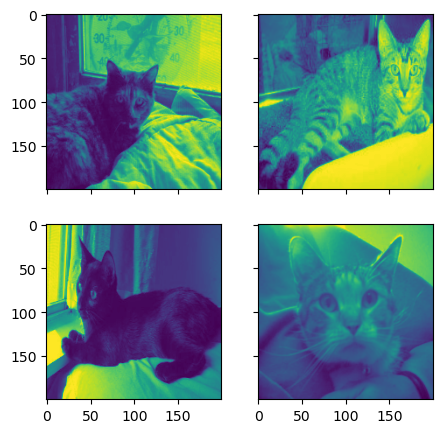

In [5]:
import random


fig, ax = plt.subplots(2,2, sharex = True, sharey = True, figsize = [5,5], )

ax[0][0].imshow(images[random.randint(0,25000)])
ax[1][0].imshow(images[random.randint(0,25000)])
ax[0][1].imshow(images[random.randint(0,25000)])
ax[1][1].imshow(images[random.randint(0,25000)])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2)

### Red Neuronal Convolucional

In [7]:
cnn_model = tf.keras.Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu", input_shape = (200, 200, 1)))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
cnn_model.add(MaxPooling2D(pool_size = 2))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation = "sigmoid"))

2022-12-05 16:14:23.606864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-05 16:14:23.607502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [8]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 64)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 50, 50, 32)        0

In [9]:
cnn_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [10]:
cnn_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2


2022-12-05 16:16:24.391418: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-05 16:16:25.392365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.5661

2022-12-05 16:17:24.955286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 66s 81ms/step - loss: 0.7240 - accuracy: 0.5661 - val_loss: 0.6663 - val_accuracy: 0.6043
Epoch 2/2
800/800 [==============================] - 60s 75ms/step - loss: 0.6490 - accuracy: 0.6345 - val_loss: 0.6393 - val_accuracy: 0.6575


In [11]:
cnn_model.evaluate(X_test, y_test)

2022-12-05 16:18:37.053102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 7s 42ms/step - loss: 0.6432 - accuracy: 0.6480


[0.6432265639305115, 0.6480000019073486]

## Modelo 3

* Capa de entrada con 32 neuronas y activación relu.
- Capa oculta de 32 neuronas y activación relu.
- Capa de Dropout de un 20%.
- Capa oculta de 128 neuronas y activación relu.
- Capa de Dropout de un 30%.
- Capa oculta de 128 neuronas y activación relu.
- Capa de Dropout de un 30%.    
- Capa oculta de 32 neuronas y activación relu.
- Capa de salida con 1 neurona y activación softmax.
- Función de pérdida: Binary Cross-Entropy.
- Optimizador rmsprop

In [12]:
input_shape = (200,200,1)

In [13]:
cnn_model3 = tf.keras.Sequential()

cnn_model3.add(Conv2D(kernel_size= 3,filters = 128, input_shape = input_shape, activation = "relu"))
cnn_model3.add(MaxPooling2D(pool_size=2,padding="same"))
cnn_model3.add(Dropout(0.2))

cnn_model3.add(Conv2D(kernel_size=2,filters=64,activation="relu"))
cnn_model3.add(Dropout(0.3))

cnn_model3.add(Conv2D(kernel_size=2,filters=64,activation="relu"))
cnn_model3.add(MaxPooling2D(pool_size=2, padding="same"))

cnn_model3.add(Flatten())
cnn_model.add(Dense(256, activation = "sigmoid"))
cnn_model3.add(Dense(1, activation = "softmax"))
cnn_model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 99, 99, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 64)        32832     
                                                                 
 dropout_4 (Dropout)         (None, 98, 98, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        16448     
                                                      

In [14]:
cnn_model3.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [15]:
cnn_model3.fit(X_train, y_train, batch_size = 10, epochs = 2, validation_split = 0.2)

Epoch 1/2


2022-12-05 16:19:05.501016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1600/1600 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5001

2022-12-05 16:23:44.976630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1600/1600 [==============================] - 296s 185ms/step - loss: 0.6782 - accuracy: 0.5001 - val_loss: 0.6187 - val_accuracy: 0.5125
Epoch 2/2
1600/1600 [==============================] - 160s 100ms/step - loss: 0.5623 - accuracy: 0.5001 - val_loss: 0.5682 - val_accuracy: 0.5125


### Red Neuronal LSTM

In [16]:
lstm_model = tf.keras.Sequential()
lstm_model.add(LSTM(64, input_shape = (200, 200)))
lstm_model.add(Dense(1))

In [17]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 67,905
Trainable params: 67,905
Non-trainable params: 0
_________________________________________________________________


In [18]:
lstm_model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [19]:
lstm_model.fit(X_train, y_train, batch_size = 20, epochs = 2, validation_split = 0.2)

Epoch 1/2


2022-12-05 16:27:03.393107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 16:27:03.500731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 16:27:04.000516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


799/800 [============================>.] - ETA: 0s - loss: 7.7045 - accuracy: 0.5003

2022-12-05 16:27:47.541821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 16:27:47.582437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 51s 61ms/step - loss: 7.7045 - accuracy: 0.5003 - val_loss: 7.9053 - val_accuracy: 0.4875
Epoch 2/2
800/800 [==============================] - 43s 54ms/step - loss: 7.7144 - accuracy: 0.4999 - val_loss: 7.9053 - val_accuracy: 0.4875


In [20]:
lstm_model.evaluate(X_test, y_test)

2022-12-05 16:28:42.869184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-05 16:28:42.916722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 5s 32ms/step - loss: 7.5521 - accuracy: 0.5104


[7.552056789398193, 0.5103999972343445]

## Audio